# Create a Graph Manually

In [1]:
import networkx as nx
G = nx.Graph()

In [2]:
G.add_node(1)
G.add_nodes_from([2, 3])

In [3]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

In [4]:
G.add_edges_from([(1, 2), (1, 3)])

## Display the Graph

In [6]:
import matplotlib.pyplot as plt

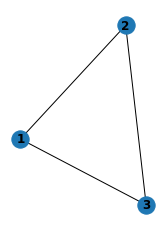

In [7]:
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

# Create Graphs Using Generators

In [9]:
er = nx.erdos_renyi_graph(30, 0.15)

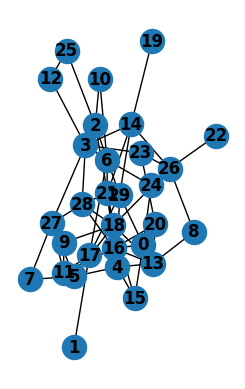

In [10]:
subax1 = plt.subplot(121)
nx.draw(er, with_labels=True, font_weight='bold')

In [11]:
ws = nx.watts_strogatz_graph(30, 3, 0.1)

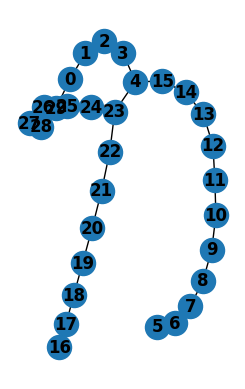

In [12]:
subax1 = plt.subplot(121)
nx.draw(ws, with_labels=True, font_weight='bold')

In [13]:
ba = nx.barabasi_albert_graph(30, 5)

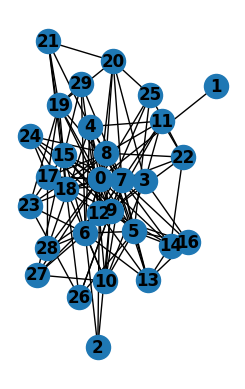

In [14]:
subax1 = plt.subplot(121)
nx.draw(ba, with_labels=True, font_weight='bold')

# Analyze Network Structure

## Erdos-Renyi Random Graph

In [15]:
sorted(d for n, d in er.degree())

[1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 7,
 8]

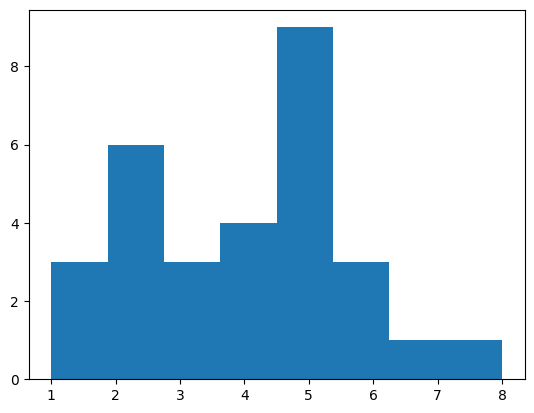

In [38]:
    degrees = [er.degree(n) for n in er.nodes()]
    plt.hist(degrees, 8)
    plt.show()

In [16]:
nx.clustering(er)

{0: 0.1,
 1: 0,
 2: 0,
 3: 0.047619047619047616,
 4: 0.2,
 5: 0.3333333333333333,
 6: 0,
 7: 1.0,
 8: 0,
 9: 0.3333333333333333,
 10: 0,
 11: 0.16666666666666666,
 12: 0,
 13: 0.2,
 14: 0,
 15: 0.3333333333333333,
 16: 0.2,
 17: 0,
 18: 0.10714285714285714,
 19: 0,
 20: 0.3333333333333333,
 21: 0.1,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0.2,
 28: 0.2,
 29: 0}

In [17]:
nx.average_clustering(er)

0.12849206349206352

In [18]:
nx.density(er)

0.135632183908046

In [19]:
nx.average_shortest_path_length(er)

2.5172413793103448

## Watts-Strogatz Small World Graph

In [20]:
sorted(d for n, d in ws.degree())

[1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3]

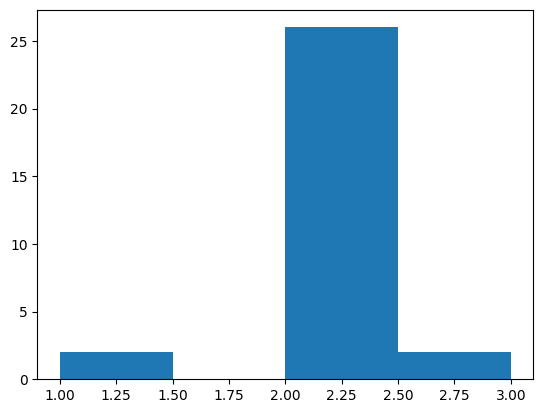

In [42]:
    ws_degrees = [ws.degree(n) for n in ws.nodes()]
    plt.hist(ws_degrees, 4)
    plt.show()

In [21]:
nx.clustering(ws)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0}

In [22]:
nx.average_clustering(ws)

0.0

In [23]:
nx.density(ws)

0.06896551724137931

In [24]:
nx.average_shortest_path_length(ws)

7.160919540229885

## Barabasi-Albert Preferential Attachment Graph

In [25]:
sorted(d for n, d in ba.degree())

[1,
 3,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 11,
 12,
 12,
 14,
 14,
 15,
 20,
 20]

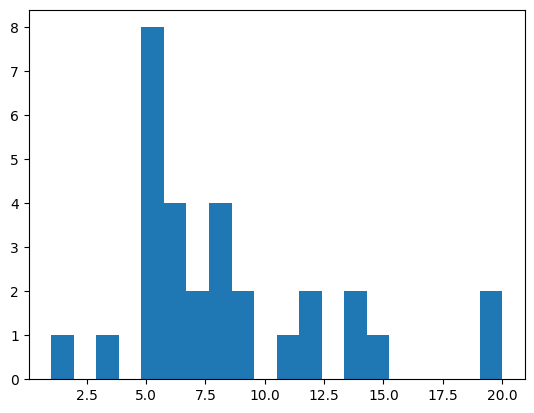

In [43]:
    ba_degrees = [ba.degree(n) for n in ba.nodes()]
    plt.hist(ba_degrees, 20)
    plt.show()

In [26]:
nx.clustering(ba)

{0: 0.2736842105263158,
 1: 0,
 2: 0.6666666666666666,
 3: 0.39285714285714285,
 4: 0.4722222222222222,
 5: 0.4090909090909091,
 6: 0.37142857142857144,
 7: 0.3368421052631579,
 8: 0.34065934065934067,
 9: 0.31868131868131866,
 10: 0.42857142857142855,
 11: 0.6,
 12: 0.3333333333333333,
 13: 0.6666666666666666,
 14: 0.6666666666666666,
 15: 0.41818181818181815,
 16: 0.6,
 17: 0.5357142857142857,
 18: 0.25,
 19: 0.4722222222222222,
 20: 0.42857142857142855,
 21: 0.3,
 22: 0.4666666666666667,
 23: 0.4666666666666667,
 24: 0.7,
 25: 0.2,
 26: 0.3,
 27: 0.6,
 28: 0.7,
 29: 0.7}

In [27]:
nx.average_clustering(ba)

0.4471797890218942

In [28]:
nx.average_shortest_path_length(ba)

1.7655172413793103

# Import Graphs

## From .txt

In [ ]:
import sys, math

In [ ]:
%pylab inline

In [ ]:
import collections as col

In [ ]:
links_out = col.defaultdict(list)
print(links_out)

In [ ]:
filepath =

## Les Miserables

## Francis Bacon

## CollegeMsg

# Analyze Imported Graphs

# Run PolyGraphs Simulations